# Adaboost
Utiliza adaboost para modelar los datos del archivo "diabetes-dataset.csv".

1. Separa los datos en dos subconjuntos. Utiliza el primero para construir el árbol y el segundo para evaluar la calidad del árbol. El conjunto de entrenamiento debe contener al 70% de las observaciones del conjunto original.
2. Aplica el adaaboost para explicar la variable de respuesta a partir de los predictores.
3. Evalúa la exactitud, precisión, sensibilidad y la especificidad del modelo sobre los datos de prueba. ¿Cuál de todas las medidas crees que es la más importante para evaluar la calidad del clasificador?

In [ ]:
data <- read.csv('diabetes-dataset.csv')
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,2,138,62,35,0,33.6,0.127,47,1
2,0,84,82,31,125,38.2,0.233,23,0
3,0,145,0,0,0,44.2,0.630,31,1
4,0,135,68,42,250,42.3,0.365,24,1
5,1,139,62,41,480,40.7,0.536,21,0
6,0,173,78,32,265,46.5,1.159,58,0


Variables predictoras:
* Pregnancies: Variable de entera
* Glucose: Variable de entera
* BlodPressure: Variable de entera
* SkinThickness: Variable de entera
* Insulin: Variable de entera
* BMI: Variable flotante
* DiabetesPedigreeFunction: Variable flotante
* Age: Variable de entera

Variable de respuesta:
* Outcome: Variable Booleana

## Exploracion de los datos
Exploramos los datos para poder sacar una hipotesis para determinar los datos.

In [ ]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness   
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 63.50   1st Qu.:  0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median : 23.00  
 Mean   : 3.704   Mean   :121.2   Mean   : 69.15   Mean   : 20.93  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.: 32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :110.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.38   1st Qu.:0.2440           1st Qu.:24.00  
 Median : 40.00   Median :32.30   Median :0.3760           Median :29.00  
 Mean   : 80.25   Mean   :32.19   Mean   :0.4709           Mean   :33.09  
 3rd Qu.:130.00   3rd Qu.:36.80   3rd Qu.:0.6240           3rd Qu.:40.00  
 Max.   :744.00   Max.   :80.60   Max.   :2.4200           Max.   :81.00  

Resultados de la exploracion de datos:
* Pregnancies:
    * En promedio tienen 3 embarazos.
    * El maximo es de 17.
* Glucose:
    * El minimo de glucosa en la sangre algunos pacientes es de 0.
    * En promedio tienen una glucosa de 121.
    * El maximo de glucosa en un paciente es de 199.
* BloodPresure
    * El valor minimo es 0.
    * En promedio tienen 69.
    * El valor maximo es de 122.
* SkinThickness
    * El valor minimo es 0.
    * En promedio tienen 20.93.
    * El valor maximo es 110.
* Insulin
    * En promedio 80.
    * El minimo de insulina encontrado es de 0.
    * El valor maximo de insulina es de 744.
* BMI
    * En promedio tenemos un valor de 32.19.
    * El mayor valor fue de 80.6.
* DiabetesPedigreeFunction
    * En promedio tenemos un 0.47.
    * El mayor valor es de 2.42.
* Age
    * En promedio los pacientes tienen 33 años.

In [ ]:
library(randomForest)
library(dplyr)
data$outcome_factor <- as.factor(data$Outcome)
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outcome_factor
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>
1,2,138,62,35,0,33.6,0.127,47,1,1
2,0,84,82,31,125,38.2,0.233,23,0,0
3,0,145,0,0,0,44.2,0.630,31,1,1
4,0,135,68,42,250,42.3,0.365,24,1,1
5,1,139,62,41,480,40.7,0.536,21,0,0
6,0,173,78,32,265,46.5,1.159,58,0,0


[1] 1316

[1] 684

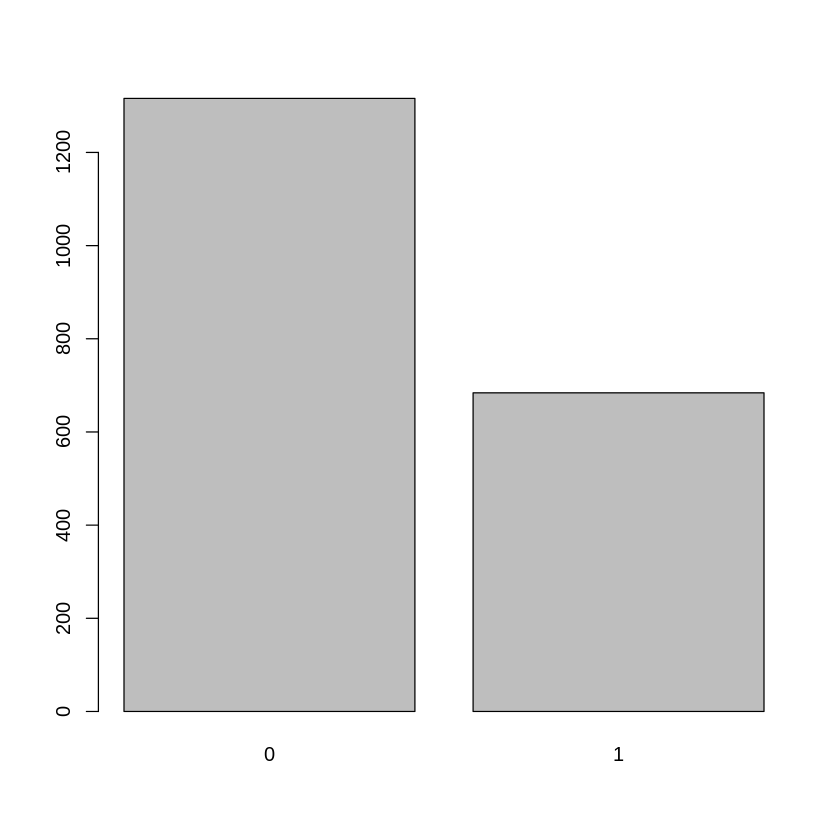

In [ ]:
Clase0 <- length(data$outcome_factor[data$outcome_factor==0])
Clase1 <- length(data$outcome_factor) - Clase0

Clase0
Clase1

plot(data$outcome_factor)

La clase 0 tiene un valor de: 1316 


La clase 1 tiene un valor de: 684



## Separación de datos

* Conjunto de entrenamiento (70%)
* Conjunto de prueba (30%)

In [ ]:
set.seed(123)

n <- nrow(data)
ind <- sample(1:n, 0.7*n)
train <- data[ind,]
test <- data[-ind,]

count(train)
count(test)

n
<int>
1400


n
<int>
600


Datos original: 2000

Datos de entrenamiento: 1400

Datos de prueba: 600


## Creacion del modelo

Utilizamos el conjunto de entrenamiento en nuestro modelo de clasificacion con el metodo AdaBoost. Despues utilizaremos el conjunto de prueba para determinar que tan buen modelo es este utilizando diversas metricas:

* Exactitud
* Presicion
* Sensibilidad/Exahustividad
* Especificidad

In [ ]:
library(adabag)

rf <- bagging(outcome_factor~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age, mfinal=10, data=train)

In [ ]:
yp <- predict(rf, test)$class
t <- table(test$outcome_factor, yp)
t

   yp
      0   1
  0 354  29
  1  72 145

In [ ]:
#Exactitud ( TP + TN )/ ( TP + TN + FP + FN )
(145+354)/(145+354+72+29)

[1] 0.8316667

In [ ]:
#Presicion TP + ( TP + FP )
(145)/(145+72)

[1] 0.6682028

In [ ]:
#Exahustividad-Sensibilidad TP / (TP + FN)
(145)/(145+29)

[1] 0.8333333

In [ ]:
#Especifidad TN / ( TN + FP )
354/(354+72)

[1] 0.8309859

Con los resultados anteriores podemos decir que:
* Exactitud: No es una metrica muy util, sin embargo tener el 83% de exactitud es un punto interesante ya que la clase 0 tiene el mayor porcentaje con 65%.
* Sensibilidad: Es una de las metricas mas importantes ya que trata de recuperar la mayor cantidad de casos positivos penalizando cuando se obtienen falsos negativos, tiene un valor de 83%.
* Presicion: Este valor trata de recuperar la mayor cantidad de casos positivos penalizando cuando hay casos positivos, tiene un valor de 66%.
* Especifidad: Debido a que estamos recuperando la mayor cantidad de casos negativos, esta metrica no nos seria muy util, tiene un valor de 83%.

En conclusion es un modelo bueno ya que supera el 65% en las metricas utiles para el contexto de los datos.